In [157]:
import pandas as pd           
import praw                   
import re                     
import datetime as dt
import seaborn as sns
import requests
import json
import sys
import time
import os
from bs4 import BeautifulSoup
from datetime import timezone, datetime
import numpy as np
from matplotlib import pyplot

'''

The purpose of this code is to clean up the downloaded data frame, by converting html into text, 
and removing uninteresting columns.

'''


with open("API.env") as file:
    exec(file.read())

reddit = praw.Reddit(
  client_id = client_id,
  client_secret = client_secret,
  user_agent = user_agent
)



'''
Some helper functions for the reddit API.
'''

def extract_num_rewards(awardings_data):
    return sum( x["count"] for x in awardings_data)

def extract_data(submission, comments = False):
    postlist = []

    # extracts top level comments

    if comments:
        submission.comments.replace_more(limit=0)
        for comment in submission.comments: 
            post = vars(comment)
            postlist.append(post)

    content = vars(submission)
    
    content["total_awards"] = extract_num_rewards(content["all_awardings"])
    return content



In [ ]:
#subreddit_df = pd.read_pickle("Data_2021/2021wsb.pkl")

In [3]:
def extract_text(s):
    if s == None:
        return None
    soup = BeautifulSoup(s)
    return soup.get_text()

subreddit_df["selftext"] = subreddit_df["selftext_html"].apply(extract_text)

In [180]:
def date(created):
    # Converts the timestamp to UTC time
    return datetime.utcfromtimestamp(created)

subreddit_df["created_datetime_utc"] = subreddit_df["created_utc"].apply(date)


In [5]:
list(subreddit_df.columns)

['comment_limit',
 'comment_sort',
 '_reddit',
 'approved_at_utc',
 'subreddit',
 'selftext',
 'author_fullname',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'top_awarded_type',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'user_reports',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'author_premium',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'author_flair_richtext',
 'gildings',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_category',
 'banned_by',
 'autho

In [181]:
cols = [ 'title',  'author',  "created_datetime_utc",  'selftext', 'url',  'upvote_ratio',  'ups', 'total_awards_received',  'num_comments', 'num_crossposts' ,'is_self',  'is_video', 'media_only', 'id',  'created_utc','selftext_html', 'author_fullname',]
subreddit_cleaned = subreddit_df[cols]

In [182]:
subreddit_cleaned.to_pickle('wsb_cleaned.pkl')

In [183]:
subreddit_cleaned

,title,author,created_datetime_utc,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
0,Nio day🚀🚀,Evdrmr,2021-01-01 23:55:39,None,https://i.redd.it/ytvyk6p47t861.jpg,0.70,11,0,15,0,False,False,False,kom7tp,1.609545e+09,None,t2_5o7wfxis
1,Stop making “meta” posts about awards. You ain’t slick,None,2021-01-01 23:51:49,[removed]\n,https://www.reddit.com/r/wallstreetbets/comments/kom59t/stop_making_meta_posts_about_awards_you_aint_slick/,1.00,1,0,0,0,True,False,False,kom59t,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p>\n</div><!-- SC_ON -->",NaN
2,Did I do something wrong (r/stocks),nathantheman,2021-01-01 23:49:52,None,https://i.redd.it/if5ewo146t861.jpg,1.00,1,0,0,0,False,False,False,kom3zp,1.609545e+09,None,t2_dwidc
3,Fuck r/stocks all my homies hate r/stocks,Danne080,2021-01-01 23:49:26,[removed]\n,https://www.reddit.com/r/wallstreetbets/comments/kom3oq/fuck_rstocks_all_my_homies_hate_rstocks/,0.71,12,0,15,0,True,False,False,kom3oq,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p>\n</div><!-- SC_ON -->",t2_cyikut2
4,$ACAM 🚀🚀🚀🚀 Go big or go home - I’ll be posting 2x / week until merger. This one is gonna get hot,None,2021-01-01 23:46:49,[deleted]\n,https://i.redd.it/bigbcmck5t861.jpg,1.00,1,0,0,0,False,False,False,kom1z8,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p>\n</div><!-- SC_ON -->",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960960,ASO technical breakout and DD,rldkyce,2021-05-06 00:02:57,"good evening apes, fellow smooth brains\nfirst off, this is not some shill FUD bs to distract you from our real fight, only an opportunity to make some quick tendies TOMORROW. I am a long time lurker and GME holder (80 at $154.18) but felt the need to share this idea.\nTo Begin:\nshares of ASO traded 8% higher today after Big 5 Sporting Goods Corporation (BGFV) reported EPS of .90 vs. expected .50. YES, almost double the expectation for Q1. Shares of BGFV had a 31% gain today.\nbased of this we can expect, at MINIMUM, some sort of EPS beat for ASO when they report later this month.\nLooking at the chart for ASO, we see that it has been trading sideways and bull-flagging nicely on the 180 day chart. With the news of BGFV's earnings beat, ASO broke out of consolidation on high volume and closed today at $33.29, just shy of ATH at $34.13.\n5.5 million shares were traded today compared to an avg daily volume of 1.84 million. This is further confirmation of the breakout.\n​\nASO from end of march 2021 to today\nASO chart from 3/19 to present day. (breakout)\nBecause we are literally at ATH's, anyone short the stock is or will soon be in the red and looking to cover that position before they become a GME style fuck up.\nASO has 30% short interest. Feel free to confirm here or anywhere else.\nhttps://www.highshortinterest.com/\nOn top of that, in my smooth brained opinion, ASO is still FAR undervalued at this level, even undervalued at $40.\nDoing some simple P/E comparison with Dick's sporting goods (DKS) and Hibbett Sports (HIBB) we see that.\nASO PE = 9.2; DKS PE = 15.02, HIBB PE = 18.49.\nNow I'm no good at math so ill leave the calculations up to you, but a PE of maybe 12 still give us an upside of nearly 33% from currently levels, or a share price of roughly $45.\nTomorrow I fully expect ASO to at least test ATH at $34.18 and if we break above we could easily see a mini squeeze pushing the price higher potentially to $40.\nPlay: Throw this on your watchlist and set an alert at $34.18 then buy shares or 35c's.\nPosition:\nhttps://preview.redd.it/zddhln6d5ex61.png?width=961&format=png&auto=webp&s=3c1832e30d65cb0432759bd53460d183756b74ed\nTLDR: ASO go up tmrw\n🚀\nEdit 1: Thank you kind Apes for my very first awards! :P\nEdit 2: u/robot-legs commented that ASO released an 8k and S1 for earlier this week including preliminary sales up nearly 38%. Keep in mind, 

In [88]:
author_popularity = subreddit_df[["author", "ups"]].groupby("author").agg(["sum", "count", "mean", 'median'])
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(50)

# A lot of the popular posts are one hit wonders...

ups                               
                          sum count           mean    median
author                                                      
SomeGuyInDeutschland   411137     1  411137.000000  411137.0
mpwrd                  210591     1  210591.000000  210591.0
84935                  209354     1  209354.000000  209354.0
kampingcarl            162833     1  162833.000000  162833.0
CockInAClock           140996     1  140996.000000  140996.0
Bundaga                139455     1  139455.000000  139455.0
liftingtailsofcats     137862     1  137862.000000  137862.0
jeepers_sheepers       126138     1  126138.000000  126138.0
LilHMoney              123084     1  123084.000000  123084.0
yellow_duck12          120417     1  120417.000000  120417.0
Pakistani_in_MURICA    113854     1  113854.000000  113854.0
DeepFuckingValue      1551072    14  110790.857143   87935.0
Lansman                109096     1  109096.000000  109096.0
TaggingSits            106587     1  106587.000000  106587.0
vrweensy               318020     3  106006.666667    3112.0
zakaria20199           103555     1  103555.000000  103555.0
garagetechnik          100896     1  100896.000000  100896.0
baha12022001            99747     1   99747.000000   99747.0
Vixul                   99346     1   99346.000000   99346.0
Greenzone51             97507     1   97507.000000   97507.0
Omaha_Beach             95597     1   95597.000000   95597.0
verifypassword__        94540     1   94540.000000   94540.0
zemora                  93269     1   93269.000000   93269.0
Xonesix                 92952     1   92952.000000   92952.0
Darlink23               92163     1   92163.000000   92163.0
BootySenpai            182060     2   91030.000000   91030.0
chubbygroundhog         90680     1   90680.000000   90680.0
everettglovier          87743     1   87743.000000   87743.0
EastCoastTaffy          87461     1   87461.000000   87461.0
NoReasons1443           86980     1   86980.000000   86980.0
ShortVIXDaily           86478     1   86478.000000   86478.0
Dotton_Creative         86120     1   86120.000000   86120.0
chopper0755             86101     1   86101.000000   86101.0
themagestikarp          85927     1   85927.000000   85927.0
always_plan_in_advan   169978     2   84989.000000   84989.0
Dillownz                81883     1   81883.000000   81883.0
GameDiggest             81617     1   81617.000000   81617.0
Hoboeser                81067     1   81067.000000   81067.0
MixMastaMace            80731     1   80731.000000   80731.0
Effective-Estimate92    77832     1   77832.000000   77832.0
JcAu20                  77070     1   77070.000000   77070.0
adnbenji               154118     2   77059.000000   77059.0
Carvalho355             76974     1   76974.000000   76974.0
DawudM                 153700     2   76850.000000   76850.0
TheElgringo             76662     1   76662.000000   76662.0
gloini                  75902     1   75902.000000   75902.0
ONE_GUY_ONE_JAR         75285     1   75285.000000   75285.0
armchairtycoon          74812     1   74812.000000   74812.0
BMWnoMoney              72665     1   72665.000000   72665.0
idea4granted           144375     2   72187.500000   72187.5

In [91]:
# How much of the leaderboard consists of people who consistently do well
author_popularity.sort_values(by = ("ups", "mean"), ascending = False).head(200).sort_values(by = ("ups", "count"), ascending = False).head(50)

ups                              
                          sum count           mean   median
author                                                     
keenfeed              1051350    26   40436.538462   6302.0
game_stone             743846    16   46490.375000   1418.0
DeepFuckingValue      1551072    14  110790.857143  87935.0
bawse1                 286204     7   40886.285714  33078.0
zachp004               253434     5   50686.800000  26280.0
punkmaster69           164777     4   41194.250000  48778.5
Fargraven              172713     4   43178.250000  21272.5
shhaayy                212009     4   53002.250000   8476.5
IDoLikeMyShishkebabs   221828     4   55457.000000  22353.0
waaaaaaaaaaaaaaahhhh   148654     4   37163.500000    387.0
N0th1ngMatt3rs5        113641     3   37880.333333      8.0
basava18               137637     3   45879.000000      8.0
fonzy541               111947     3   37315.666667    258.0
SaintHakop             157698     3   52566.000000     28.0
ilikelucy1             167446     3   55815.333333    196.0
freshwater21           129189     3   43063.000000    357.0
GimliSagol             125567     3   41855.666667   7960.0
fuk_normies            108298     3   36099.333333    505.0
Kobeer19               126427     3   42142.333333  57866.0
TheRoaringKitty        128053     3   42684.333333  28545.0
vrweensy               318020     3  106006.666667   3112.0
cyberupdate            129982     3   43327.333333      1.0
Lunar033               187727     3   62575.666667   1890.0
WalyWal                 88764     2   44382.000000  44382.0
devllen05               85532     2   42766.000000  42766.0
adnbenji               154118     2   77059.000000  77059.0
skybike                121698     2   60849.000000  60849.0
Baalk_                 108775     2   54387.500000  54387.5
DawudM                 153700     2   76850.000000  76850.0
BAKAYAROUUUUU          121819     2   60909.500000  60909.5
InFiveMinutes           90297     2   45148.500000  45148.5
Shrubber                85403     2   42701.500000  42701.5
MarioBuzo              110052     2   55026.000000  55026.0
idea4granted           144375     2   72187.500000  72187.5
Wilcoo1                111011     2   55505.500000  55505.5
Networking4Eyes        113062     2   56531.000000  56531.0
Sixstringcal            78822     2   39411.000000  39411.0
furkix                  88810     2   44405.000000  44405.0
GenKaYY                 78945     2   39472.500000  39472.5
mateotrujillowheeler   103442     2   51721.000000  51721.0
therickyy               73054     2   36527.000000  36527.0
BootySenpai            182060     2   91030.000000  91030.0
Geko2012               101230     2   50615.000000  50615.0
HistoryGuardian         71924     2   35962.000000  35962.0
DerivativeIntegral      71819     2   35909.500000  35909.5
l8rnurd                 73331     2   36665.500000  36665.5
vedxddy                 71008     2   35504.000000  35504.0
CHAINSAW_VASECTOMY      71000     2   35500.000000  35500.0
DMmeYourCat             94777     2   47388.500000  47388.5
Darxe                   74856     2   37428.000000  37428.0

<AxesSubplot:>

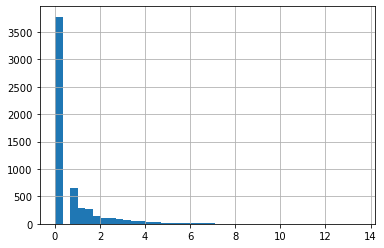

In [56]:
subreddit_df.ups.value_counts().apply( lambda x : np.log(x)).hist(bins = 40)

<AxesSubplot:xlabel='created_datetime', ylabel='ups'>

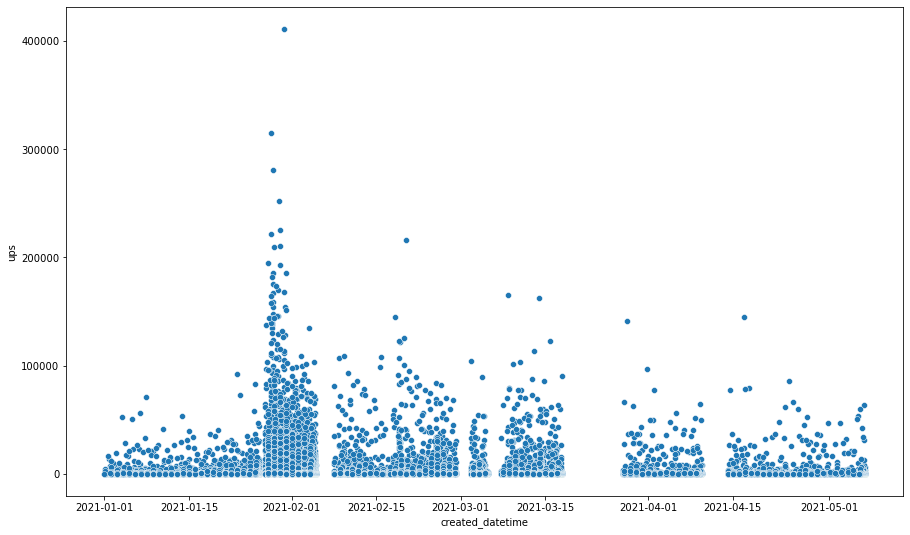

In [109]:


#subreddit_cleaned["log_ups"] = subreddit_cleaned["ups"].apply( lambda x : np.log(x))

fig, ax = pyplot.subplots(figsize=(15, 9))
sns.scatterplot(data = subreddit_cleaned[subreddit_cleaned["ups"] >= 40], x = "created_datetime", y = "ups")

# Note the missing dates! I think this comes from times that the subreddit went private? I'm not sure.

<AxesSubplot:xlabel='created_datetime', ylabel='num_comments'>

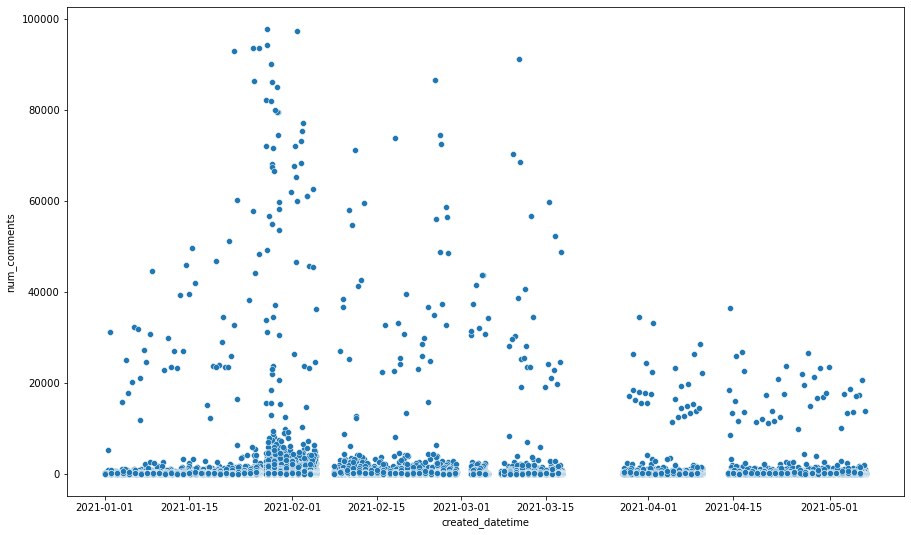

In [108]:
fig, ax = pyplot.subplots(figsize=(15, 9))
sns.scatterplot(ax=ax, data = subreddit_cleaned[subreddit_cleaned["ups"] >= 40], x = "created_datetime", y = "num_comments")

<AxesSubplot:xlabel='num_comments', ylabel='ups'>

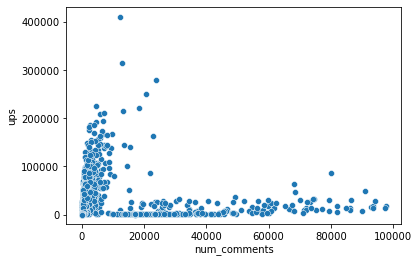

In [39]:
sns.scatterplot(data = subreddit_cleaned[subreddit_cleaned.ups > 40], x = "num_comments", y = "ups")

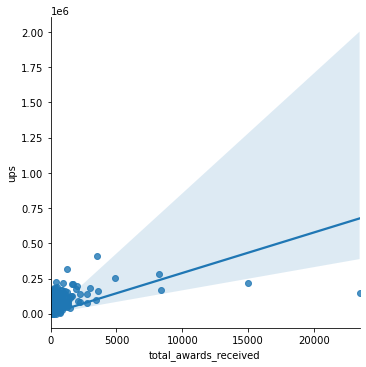

In [41]:
sns.lmplot(data = subreddit_cleaned[subreddit_cleaned.ups > 40], x = "total_awards_received", y = "ups")

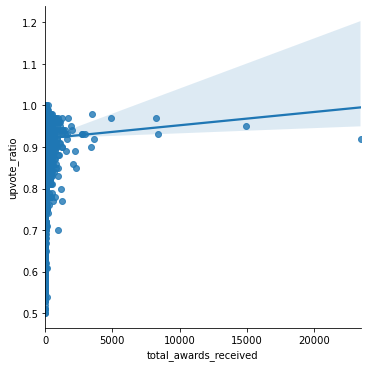

In [43]:
sns.lmplot(data = subreddit_cleaned[subreddit_cleaned.ups > 40], x = "total_awards_received", y = "upvote_ratio")

,title,author,created_datetime,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname,log_ups
0,Nio day🚀🚀,Evdrmr,2021-01-01 23:55:39+00:00,None,https://i.redd.it/ytvyk6p47t861.jpg,0.70,11,0,15,0,False,False,False,kom7tp,1.609545e+09,None,t2_5o7wfxis,2.397895
1,Stop making “meta” posts about awards. You ain...,None,2021-01-01 23:51:49+00:00,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,1.00,1,0,0,0,True,False,False,kom59t,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",NaN,0.000000
2,Did I do something wrong (r/stocks),nathantheman,2021-01-01 23:49:52+00:00,None,https://i.redd.it/if5ewo146t861.jpg,1.00,1,0,0,0,False,False,False,kom3zp,1.609545e+09,None,t2_dwidc,0.000000
3,Fuck r/stocks all my homies hate r/stocks,Danne080,2021-01-01 23:49:26+00:00,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.71,12,0,15,0,True,False,False,kom3oq,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_cyikut2,2.484907
4,$ACAM 🚀🚀🚀🚀 Go big or go home - I’ll be posting...,None,2021-01-01 23:46:49+00:00,[deleted]\n,https://i.redd.it/bigbcmck5t861.jpg,1.00,1,0,0,0,False,False,False,kom1z8,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960960,ASO technical breakout and DD,rldkyce,2021-05-06 00:02:57+00:00,"good evening apes, fellow smooth brains\nfirst...",https://www.reddit.com/r/wallstreetbets/commen...,0.78,44,10,54,0,True,False,False,n5udz9,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>good evening...",t2_4p2nwfnu,3.784190
960961,First YOLO on CRSR,None,2021-05-06 00:02:55+00:00,[deleted]\n,https://i.redd.it/l0729o9g5ex61.png,0.57,2,0,1,0,False,False,False,n5udy3,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN,0.693147
960962,Rkt to the moon!,Disastrous-Egg9959,2021-05-06 00:02:43+00:00,[removed]\n,https://www.reddit.com/r/wallstreetbets/commen...,0.48,0,0,11,0,True,False,False,n5udsv,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p...",t2_7hzx72of,-inf
960963,My therapist told me I’m delusional for thinki...,None,2021-05-06 00:02:38+00:00,[deleted]\n,https://i.redd.it/f2up498f5ex61.jpg,0.33,0,0,1,0,False,False,False,n5udq9,1.620259e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p...",NaN,-inf


In [110]:
kaggle_version = pd.read_csv('Data_2021/kaggle_wsb.csv')

In [111]:
kaggle_version

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
46518,"NIO After Earnings, Analysis, and Valuation",68,n4xon5,https://www.reddit.com/r/wallstreetbets/commen...,41,1.620190e+09,I'm late because I wanted to get some feedback...,2021-05-05 07:42:20
46519,Suncor (SU) update. They crushed earnings. Ple...,338,n4xfwh,https://i.redd.it/kc9jabowy5x61.jpg,56,1.620189e+09,NaN,2021-05-05 07:31:59
46520,YOLO NCLH,0,n4wrsw,https://i.redd.it/bebc0fx3u5x61.jpg,10,1.620187e+09,NaN,2021-05-05 07:04:58
46521,$23k ICE calls 7/16 $125,0,n4wrl9,https://www.reddit.com/r/wallstreetbets/commen...,4,1.620187e+09,I loved seeing its value drop from $23k to $5k...,2021-05-05 07:04:44


In [119]:

kaggle_version['timestamp'] = pd.to_datetime(kaggle_version['timestamp'])

<AxesSubplot:xlabel='timestamp', ylabel='score'>

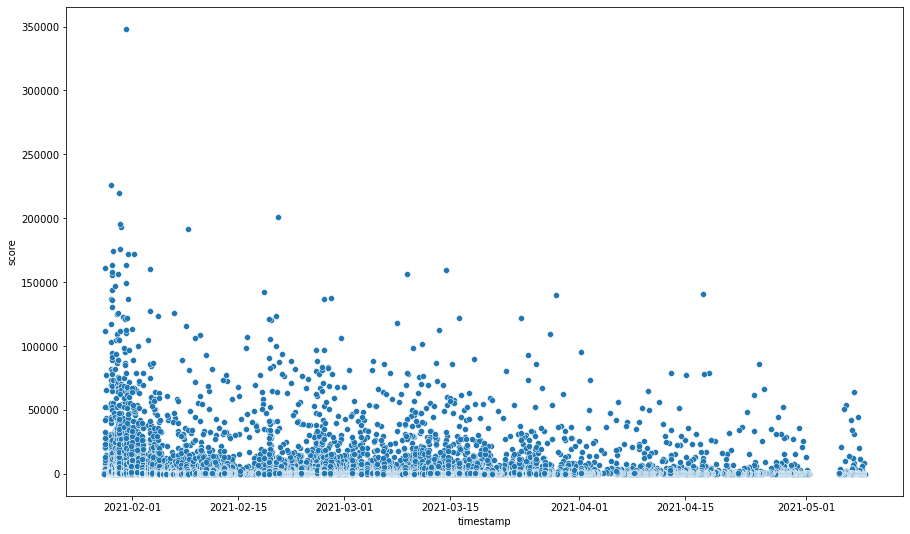

In [120]:

fig, ax = pyplot.subplots(figsize=(15, 9))

sns.scatterplot(data = kaggle_version[kaggle_version['score'] >= 20], x = "timestamp", y = "score")


In [145]:
pd.set_option('display.max_colwidth', None)
kaggle_version[kaggle_version['timestamp'] > datetime(2021, 2,6)]

title  \
28551                                                         For those still using RH, STOP IT!   
28552                                                     GME AMC - Sell Low then Buy High - FYI   
28553                                                               WOOW TALK ABOUT MANIPULATION   
28554                                                                            Good job tards!   
28555          I've been around for a while and wanted to show off some of my bags (ignore $MCD)   
...                                                                                          ...   
46518                                                NIO After Earnings, Analysis, and Valuation   
46519  Suncor (SU) update. They crushed earnings. Please don’t be too jealous of my gains today.   
46520                                                                                  YOLO NCLH   
46521                                                                   $23k ICE calls 7/16 $125   
46522                                           [$NOK]🚀🌕 Why Nokia is massivly underated! 🚀🌕$10+   

       score      id  \
28551     31  ldaom1   
28552     29  ld98kg   
28553     29  ld98kc   
28554     68  ld98ap   
28555     25  ld98an   
...      ...     ...   
46518     68  n4xon5   
46519    338  n4xfwh   
46520      0  n4wrsw   
46521      0  n4wrl9   
46522    108  n4wqff   

                                                                                                      url  \
28551           https://www.reddit.com/r/wallstreetbets/comments/ldaom1/for_those_still_using_rh_stop_it/   
28552         https://www.reddit.com/r/wallstreetbets/comments/ld98kg/gme_amc_sell_low_then_buy_high_fyi/   
28553               https://www.reddit.com/r/wallstreetbets/comments/ld98kc/woow_talk_about_manipulation/   
28554                             https://www.reddit.com/r/wallstreetbets/comments/ld98ap/good_job_tards/   
28555                                                                 https://i.redd.it/el436c7vdof61.png   
...                                                                                                   ...   
46518  https://www.reddit.com/r/wallstreetbets/comments/n4xon5/nio_after_earnings_analysis_and_valuation/   
46519                                                                 https://i.redd.it/kc9jabowy5x61.jpg   
46520                                                                 https://i.redd.it/bebc0fx3u5x61.jpg   
46521                      https://www.reddit.com/r/wallstreetbets/comments/n4wrl9/23k_ice_calls_716_125/   
46522     https://www.reddit.com/r/wallstreetbets/comments/n4wqff/nok_why_nokia_is_massivly_underated_10/   

       comms_num       created  \
28551         13  1.612571e+09   
28552          2  1.612567e+09   
28553          9  1.612567e+09   
28554          9  1.612567e+09   
28555          8  1.612567e+09   
...          ...           ...   
46518         41  1.620190e+09   
46519         56  1.620189e+09   
46520         10  1.620187e+09   
46521          4  1.620187e+09   
46522         58  1.620187e+09   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [147]:
#subreddit_cleaned['created_datetime'] = pd.to_datetime(subreddit_cleaned.created_utc).dt.tz_localize(None)

#subreddit_cleaned[subreddit_cleaned['created_datetime'] > datetime(2021, 2,6)]

In [146]:
subreddit_cleaned[subreddit_cleaned.id.str.contains("ldaom1")]

,title,author,created_datetime,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname


In [148]:
kaggle_version[kaggle_version.id.str.contains("ldaom1")]

,title,score,id,url,comms_num,created,body,timestamp
28551,"For those still using RH, STOP IT!",31,ldaom1,https://www.reddit.com/r/wallstreetbets/comments/ldaom1/for_those_still_using_rh_stop_it/,13,1.612571e+09,"There are hundreds of lessons to be learned from the last 2 weeks and you retards didn't even learn the simplest one, to stop using robinhood.",2021-02-06 02:21:25


In [150]:
missing_ids = set(kaggle_version.id).difference(set(subreddit_cleaned.id))

In [151]:
len(missing_ids)
missing_rows = kaggle_version[kaggle_version.id.isin(missing_ids)]
missing_rows

9124

In [174]:
missing_ids = set(subreddit_cleaned[subreddit_cleaned['created_datetime'] < datetime(2021, 2,6)].id).difference(set(kaggle_version.id))
print(len(missing_ids))
missing_rows = subreddit_cleaned[subreddit_cleaned.id.isin(missing_ids)]
missing_rows

678947


,title,author,created_datetime,selftext,url,upvote_ratio,ups,total_awards_received,num_comments,num_crossposts,is_self,is_video,media_only,id,created_utc,selftext_html,author_fullname
0,Nio day🚀🚀,Evdrmr,2021-01-01 23:55:39,None,https://i.redd.it/ytvyk6p47t861.jpg,0.70,11,0,15,0,False,False,False,kom7tp,1.609545e+09,None,t2_5o7wfxis
1,Stop making “meta” posts about awards. You ain’t slick,None,2021-01-01 23:51:49,[removed]\n,https://www.reddit.com/r/wallstreetbets/comments/kom59t/stop_making_meta_posts_about_awards_you_aint_slick/,1.00,1,0,0,0,True,False,False,kom59t,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p>\n</div><!-- SC_ON -->",NaN
2,Did I do something wrong (r/stocks),nathantheman,2021-01-01 23:49:52,None,https://i.redd.it/if5ewo146t861.jpg,1.00,1,0,0,0,False,False,False,kom3zp,1.609545e+09,None,t2_dwidc
3,Fuck r/stocks all my homies hate r/stocks,Danne080,2021-01-01 23:49:26,[removed]\n,https://www.reddit.com/r/wallstreetbets/comments/kom3oq/fuck_rstocks_all_my_homies_hate_rstocks/,0.71,12,0,15,0,True,False,False,kom3oq,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p>\n</div><!-- SC_ON -->",t2_cyikut2
4,$ACAM 🚀🚀🚀🚀 Go big or go home - I’ll be posting 2x / week until merger. This one is gonna get hot,None,2021-01-01 23:46:49,[deleted]\n,https://i.redd.it/bigbcmck5t861.jpg,1.00,1,0,0,0,False,False,False,kom1z8,1.609545e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p>\n</div><!-- SC_ON -->",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705555,isthesqueezesquoze.com is down?,NicestDude,2021-02-04 00:00:24,[removed]\n,https://www.reddit.com/r/wallstreetbets/comments/lc26u9/isthesqueezesquozecom_is_down/,1.00,1,0,0,0,True,False,False,lc26u9,1.612397e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p>\n</div><!-- SC_ON -->",t2_3a1s1m1
705556,Introduce share ID to prevent “short ladder attacks”,Fuck-it-allin,2021-02-04 00:00:16,[removed]\n,https://www.reddit.com/r/wallstreetbets/comments/lc26p2/introduce_share_id_to_prevent_short_ladder_attacks/,1.00,1,0,0,0,True,False,False,lc26p2,1.612397e+09,"<!-- SC_OFF --><div class=""md""><p>[removed]</p>\n</div><!-- SC_ON -->",t2_7t7uwnnu
705557,Is The Squeeze Squoze might be dowm,MainThrowaway1337,2021-02-04 00:00:16,None,https://www.isitdownrightnow.com/isthesqueezesquoze.com.html,1.00,1,0,1,0,False,False,False,lc26od,1.612397e+09,None,t2_4u2ewi8v
705558,SEC says no speaky about tendies with internet friends but billionaires can talk about whole chickens at their country club meetings.,None,2021-02-04 00:00:08,[deleted]\n,https://i.redd.it/4pglmdw0qcf61.jpg,0.50,0,0,0,0,False,False,False,lc26ff,1.612397e+09,"<!-- SC_OFF --><div class=""md""><p>[deleted]</p>\n</div><!-- SC_ON -->",NaN


In [173]:
kaggle_version[kaggle_version.id == 'kom59t']

,title,score,id,url,comms_num,created,body,timestamp


In [159]:
# Based on this: https://www.reddit.com/r/redditdev/comments/aoe4pk/praw_getting_multiple_submissions_using_by_id/
ids2 = [i if i.startswith('t3_') else f't3_{i}' for i in missing_ids]


praw_submissions = []
for submission in reddit.info(ids2): # Makes a single call to the PRAW API, much faster than doing them one by one.
    praw_submissions.append(extract_data(submission))

praw_df = pd.DataFrame(praw_submissions)
print(f"PRAW found {len(praw_df)} submissions.")

PRAW found 9123 submissions.


In [184]:
#list(praw_df.columns)

In [186]:
praw_df

,comment_limit,comment_sort,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,...,author_premium,author_flair_richtext,author_flair_type,author_patreon_flair,post_hint,preview,is_gallery,media_metadata,gallery_data,author_cakeday
0,2048,confidence,<praw.reddit.Reddit object at 0x0000029DE9F5A790>,None,wallstreetbets,[deleted],[],False,None,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2048,confidence,<praw.reddit.Reddit object at 0x0000029DE9F5A790>,None,wallstreetbets,"DD I saw posted elsewhere: hedge funds are trying their hardest to short ladder $AMC and $GME. Just hold your stock, buy more if you can afford to! \n\nCheck out real time trade stats by googling: ""Nasdaq AMC real time trades"" and you'll see all the trade orders are 100 share volumes every millisecond. \n\nThese are desperate hedge funds trading their stocks back and forth for a lower and lower price, driving the price down. The price drop means absolutely nothing AS LONG AS EVERYONE IS HOLDING, this will explode!\n\nThe shirts tried their damndest to drive down the share prices of both $GME and $AMC today. Specifically look at $AMC. With all that volume traded you’d expect a shitload more movement. What they got was **resistance** You could see them continuing the ladder attack after hours when YOU can’t trade. On BOTH stocks. \n\nThe way forward is to tell them to go fuck themselves and BUY that shit up tomorrow. Let them keep punting the football back and forth to one another all day. If they can double down and play the long game SO can we. \n\nThis is not financial advice. I’m just a retard who REALLY likes these stocks.\n\nEdit: **LOOK AT THIS SHIT LOL** https://twitter.com/beijing_bobby/status/1356377066988564486/photo/1\n\nEdit 2: **IF YOU’RE WONDERING IF YOU ARE DOING THE RIGHT THING WITH $AMC EL PRES KNOWS AND IS STILL HOLDING.** \nhttps://twitter.com/Thowe51/status/1356320431142268928?s=20",[],False,None,7,...,True,[],text,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2048,confidence,<praw.reddit.Reddit object at 0x0000029DE9F5A790>,None,wallstreetbets,,[],False,None,0,...,False,[],text,False,image,"{'images': [{'source': {'url': 'https://preview.redd.it/6fgndyt4xkf61.jpg?auto=webp&s=f205fa9fcde0b0a2fcb7560afe1070c5e1c36b07', 'width': 1242, 'height': 2208}, 'resolutions': [{'url': 'https://preview.redd.it/6fgndyt4xkf61.jpg?width=108&crop=smart&auto=webp&s=cf9cbeb4ad7d4756beeb552cbab30f31c7994642', 'width': 108, 'height': 192}, {'url': 'https://preview.redd.it/6fgndyt4xkf61.jpg?width=216&crop=smart&auto=webp&s=feed2d69b87680531b60fbfe18beb016a123e922', 'width': 216, 'height': 384}, {'url': 'https://preview.redd.it/6fgndyt4xkf61.jpg?width=320&crop=smart&auto=webp&s=e788b2a8f81ae157826bb76eacbc26e13994f55b', 'width': 320, 'height': 568}, {'url': 'https://preview.redd.it/6fgndyt4xkf61.jpg?width=640&crop=smart&auto=webp&s=0089b7c95e8fa61d2ee64761346b986fb31f93b9', 'width': 640, 'height': 1137}, {'url': 'https://preview.redd.it/6fgndyt4xkf61.jpg?width=960&crop=smart&auto=webp&s=325f0a710f9b3c597e1475dddcfb9cf8d34d1ef9', 'width': 960, 'height': 1706}, {'url': 'https://preview.redd.it/6fgndyt4xkf61.jpg?width=1080&crop=smart&auto=webp&s=0244ec56d5f644a271d4290f467a7781629a2922', 'width': 1080, 'height': 1920}], 'variants': {}, 'id': 'jOrNLE5z6M-n3GNQJDeBH5HpXrfRmo5maiLEwFWlU_Q'}], 'enabled': True}",NaN,NaN,NaN,NaN
3,2048,confidence,<praw.reddit.Reddit object at 0x0000029DE9F5A790>,None,wallstreetbets,"If there’s anything I feel like right now, it’s that I’m riding the wave.\n\nI love the emojis we have now but let’s keep that COURAGE and CREATIVITY flowing.\n\nHow about a wave — a second wave? Well, now that trading restrictions are lifted on BANG stock by brokerages, and it’s on sale it feels like the sky is the limit.\n\nAnd it’s Friday. The energy is on our side.\n\nWho’s feeling the wave?? 🌊🌊🌊🌊🌊",[],False,None,0,...,False,[],text,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2048,confidence,<praw.reddit.Reddit object at 0x0000029DE9F5A790>,Non